In [1]:
from langchain_openai import ChatOpenAI


# Testing for Accuracy + Positional Bias

In [2]:
tool_selection_test_data = [
    ('What is the price of ethereum right now?', 'crypto_and_nft_tool'),
    ('What is the price of bitcoin right now?', 'crypto_and_nft_tool'),
    ('Check the floor price of the world of women nft', 'crypto_and_nft_tool'),
    ('Give me dogecoin price', 'crypto_and_nft_tool'),

    ('Add a new row and just write "To do" in it', 'google_spreadsheet_tool'),
    ('Add this data to the spreadsheet: "1, 2, 3"', 'google_spreadsheet_tool'),
    ('Add: "Sinan, Pearson" to the spreadsheet', 'google_spreadsheet_tool'),
    ('Check the calculated sum of the first column', 'google_spreadsheet_tool'),
    

    ('Go to https://loopgenius.com and tell me about it', 'firecrawl_tool'),
    ('Visit https://github.com/trending and list top repositories', 'firecrawl_tool'),
    ('Scrape the main headlines from https://news.ycombinator.com', 'firecrawl_tool'),
    ('Go to https://en.wikipedia.org/wiki/Python_(programming_language) and summarize the introduction', 'firecrawl_tool'),
    ('Check the documentation at https://pytorch.org and tell me the latest version name', 'firecrawl_tool'),
    ('Visit https://openai.com and summarize the homepage', 'firecrawl_tool'),
    ('What is the headline on https://bbc.com/news', 'firecrawl_tool'),

    ('What are the current gas prices in Chicago?', 'serp_tool'),
    ('Find the intro.co link for Sinan Ozdemir', 'serp_tool'),
    ('What is the release date of the next Marvel movie?', 'serp_tool'),
    ('Who won the latest Super Bowl?', 'serp_tool'),
    ('What are the top restaurants in New York City?', 'serp_tool'),
    ('Get the latest stock price for Apple (AAPL)', 'serp_tool'),
    ('List the top 5 popular programming languages in 2024', 'serp_tool'),
    ('Look up the conversion from 98 degrees Fahrenheit to Celsius on the web', 'serp_tool'),

    ('Convert 98 degrees Fahrenheit to Celsius using Python', 'python_repl_tool'),
    ('Write a function that yields the nth fibonacci number and use it to find the 100th fibonacci number', 'python_repl_tool'),
    ('Calculate the factorial of 10 using Python', 'python_repl_tool'),
    ('Calculate 15% of 34543.453', 'python_repl_tool'),
    ('Convert 42 kilometers to miles using a function in Python', 'python_repl_tool'),
    ('Generate a random number between 1 and 1000', 'python_repl_tool'),
    
    # CRM Contact Tool
    ('Add a new contact named John Smith with email john@example.com', 'crm_contact_tool'),
    ('Search for contacts at Google company', 'crm_contact_tool'),
    ('Update contact ID 123 to change their phone number', 'crm_contact_tool'),
    ('Delete the contact with ID 456', 'crm_contact_tool'),
    ('List all contacts in the CRM system', 'crm_contact_tool'),
    
    # eBay Price Tool
    ('Check the current eBay price for iPhone 15 Pro', 'ebay_price_tool'),
    ('What is the average price of a used MacBook Pro on eBay?', 'ebay_price_tool'),
    ('Find the eBay selling price for vintage Pokemon cards', 'ebay_price_tool'),
    ('Look up the market value of a 2020 Toyota Camry on eBay', 'ebay_price_tool'),
    ('Check eBay prices for refurbished iPad Air', 'ebay_price_tool'),
    
    # Calendar Scheduling Tool
    ('Schedule a meeting for tomorrow at 2 PM', 'calendar_scheduling_tool'),
    ('Show me my calendar for next week', 'calendar_scheduling_tool'),
    ('Update my 3 PM meeting to 4 PM', 'calendar_scheduling_tool'),
    ('Delete the event with ID 789', 'calendar_scheduling_tool'),
    ('Find available time slots for a 2-hour meeting this Friday', 'calendar_scheduling_tool'),
    
    # Email Sender Tool
    ('Send an email to sarah@company.com about the project update', 'email_sender_tool'),
    ('Email the team about tomorrow\'s meeting with agenda attached', 'email_sender_tool'),
    ('Send a follow-up email to the client with the proposal', 'email_sender_tool'),
    ('Email my boss about the vacation request', 'email_sender_tool'),
    ('Send a thank you email to the interview panel', 'email_sender_tool'),
    
    # Social Media Tool
    ('Post "Just finished a great workout!" to Twitter', 'social_media_tool'),
    ('Schedule a LinkedIn post for next Monday about our product launch', 'social_media_tool'),
    ('Delete my Facebook post from yesterday', 'social_media_tool'),
    ('Get analytics for my Instagram post from last week', 'social_media_tool'),
    ('Post a photo to Instagram with hashtags #sunset #nature', 'social_media_tool'),
    
    # Weather Forecast Tool
    ('What\'s the weather like in Miami this weekend?', 'weather_forecast_tool'),
    ('Give me a detailed 7-day forecast for New York City', 'weather_forecast_tool'),
    ('Check the hourly weather for Chicago today', 'weather_forecast_tool'),
    ('What\'s the current temperature in Los Angeles?', 'weather_forecast_tool'),
    ('Get the weather forecast for my location for the next 3 days', 'weather_forecast_tool'),
    
    # File Storage Tool
    ('Upload my resume.pdf to the cloud storage', 'file_storage_tool'),
    ('Download the project files from /work/documents/', 'file_storage_tool'),
    ('Share the presentation.pptx file with read-only access', 'file_storage_tool'),
    ('Move the photos from /personal/ to /archive/', 'file_storage_tool'),
    ('List all files in the /projects/ folder', 'file_storage_tool'),
    
    # Database Query Tool
    ('Select all users from the customers table', 'database_query_tool'),
    ('Insert a new product record into the inventory database', 'database_query_tool'),
    ('Update the price of product ID 123 in the products table', 'database_query_tool'),
    ('Delete all orders older than 2 years from the orders table', 'database_query_tool'),
    ('Create a new table called employee_reviews', 'database_query_tool'),
    
    # Translation Tool
    ('Translate "Hello, how are you?" to Spanish', 'translation_tool'),
    ('Convert this French text to English: "Bonjour, comment allez-vous?"', 'translation_tool'),
    ('Translate the German phrase "Wie geht es dir?" to Italian', 'translation_tool'),
    ('Convert "Thank you very much" to Japanese', 'translation_tool'),
    ('Translate this business email to Portuguese', 'translation_tool'),
    
    # PDF Document Tool
    ('Extract all text from the contract.pdf file', 'pdf_document_tool'),
    ('Merge these 3 PDF files into one document', 'pdf_document_tool'),
    ('Split the large report.pdf into separate chapters', 'pdf_document_tool'),
    ('Convert this PDF to a Word document', 'pdf_document_tool'),
    ('Generate a PDF report from the quarterly data', 'pdf_document_tool'),
]


In [3]:
import os
import random

# Define tool snippets
tool_snippets = [
    '''
@mcp.tool()
def google_spreadsheet_tool(action: str = "append_to_sheet", **kwargs) -> dict:
    """
    Executes specified actions on the Google Spreadsheet.

    :param action: The action to perform ("append_to_sheet", "search", "insert_into_cell", "get_data_in_range", "describe").
    :Additional arguments for each specific action:
        - "search": 
            "search" will return the row indices where the search_value is found in the column_name.
            Requires 'search_value' and 'column_name'. Example: {"action": "search", "search_value": "John", "column_name": "Name"}
        - "append_to_sheet":
            "append_to_sheet" will append the data to the end of the sheet.
            Requires 'data'. Example: {"action": "append_to_sheet", "data": [["John", "Doe", "john.doe@example.com"], ["Jane", "Smith", "jane.smith@example.com"]]}
        - "insert_into_cell": 
            "insert_into_cell" will insert the value into the specified cell.
            Requires 'value' and 'cell'. Example: {"action": "insert_into_cell", "value": "New Value", "cell": "A1"}
        - "get_data_in_range": 
            "get_data_in_range" will return the data in the specified range.
            Requires 'range_name'. Example: {"action": "get_data_in_range", "range_name": "Sheet1!A1:B2"} or {"action": "get_data_in_range",    "range_name": "Contacts!A12:G28"}
        - "describe": 
            "describe" will return the number of columns and rows in the sheet.
            No additional arguments. Example: {"action": "describe"}
    :return: The result of the operation.
    """
    return f"Fake response for google spreadsheet operation: {action}"
''',
    '''
@mcp.tool()
def crypto_and_nft_tool(query: str) -> str:
    """Get current cryptocurrency prices and NFT prices around the world and for a specific wallet.
    :param query: The query to search for cryptocurrency or NFT prices.
    :return: The current cryptocurrency or NFT prices.
    """
    
    return f"Fake response for crypto/NFT query: {query}"
''',
    '''
@mcp.tool()
def firecrawl_tool(website_url: str) -> str:
    """
    Crawl webpages and return a markdown version of the html on the page
    :param website_url: The URL of the website to scrape
    return: The markdown version of the html on the page
    """
    return f"Scraped data from: {website_url}"
''',
    '''
@mcp.tool()
def serp_tool(query: str) -> str:
    """Search the web for information using the Google Search Engine
    :param query: The query to search for.
    :return: The search result.
    """
    return f"Search result for query: {query}"
''',
    '''
@mcp.tool()
def python_repl_tool(code: str) -> str:
    """
    Execute valid python code and returns the printed values in the code
    :param command: The Python command to run. Always end with a print statement to show the output like "print(output)"
    :return: The output of the code.
    """
    try:
        result = eval(code)
        return str(result)
    except Exception as e:
        return f"Error: {e}"
''',
    '''
@mcp.tool()
def crm_contact_tool(action: str, **kwargs) -> str:
    """
    Manage contacts in CRM system - add, search, update, delete contacts
    :param action: The action to perform ("add", "search", "update", "delete", "list")
    :Additional arguments based on action:
        - "add": Requires 'name', 'email', optional 'phone', 'company'
        - "search": Requires 'query' (name, email, or company)
        - "update": Requires 'contact_id' and fields to update
        - "delete": Requires 'contact_id'
        - "list": No additional arguments
    :return: Result of the CRM operation
    """
    return f"CRM operation '{action}' completed with args: {kwargs}"
''',
    '''
@mcp.tool()
def ebay_price_tool(item_name: str, condition: str = "used") -> str:
    """
    Check current eBay prices for items, get sold listings and average prices
    :param item_name: The name or description of the item to check
    :param condition: The condition of the item ("new", "used", "refurbished")
    :return: Current eBay price information and recent sold listings
    """
    return f"eBay price check for '{item_name}' in {condition} condition: Average price $125.99"
''',
    '''
@mcp.tool()
def calendar_scheduling_tool(action: str, **kwargs) -> str:
    """
    Manage calendar events and scheduling - create, view, update, delete events
    :param action: The action to perform ("create", "view", "update", "delete", "find_available")
    :Additional arguments based on action:
        - "create": Requires 'title', 'date', 'time', optional 'duration', 'attendees'
        - "view": Requires 'date' or 'date_range'
        - "update": Requires 'event_id' and fields to update
        - "delete": Requires 'event_id'
        - "find_available": Requires 'date', 'duration'
    :return: Result of the calendar operation
    """
    return f"Calendar operation '{action}' completed with args: {kwargs}"
''',
    '''
@mcp.tool()
def email_sender_tool(to: str, subject: str, body: str, **kwargs) -> str:
    """
    Send emails through various email providers with attachments and formatting
    :param to: Recipient email address
    :param subject: Email subject line
    :param body: Email body content
    :param cc: CC recipients (optional)
    :param bcc: BCC recipients (optional)
    :param attachments: List of file paths to attach (optional)
    :return: Email send confirmation
    """
    return f"Email sent to {to} with subject '{subject}'"
''',
    '''
@mcp.tool()
def social_media_tool(platform: str, action: str, content: str = "", **kwargs) -> str:
    """
    Post content to social media platforms, manage posts, and get analytics
    :param platform: The platform to use ("twitter", "facebook", "instagram", "linkedin")
    :param action: The action to perform ("post", "schedule", "delete", "analytics")
    :param content: The content to post (for post/schedule actions)
    :Additional arguments based on action:
        - "post": Requires 'content', optional 'media_urls', 'hashtags'
        - "schedule": Requires 'content', 'schedule_time'
        - "delete": Requires 'post_id'
        - "analytics": Requires 'post_id' or 'date_range'
    :return: Result of the social media operation
    """
    return f"Social media operation on {platform}: {action} completed"
''',
    '''
@mcp.tool()
def weather_forecast_tool(location: str, days: int = 1, details: str = "basic") -> str:
    """
    Get weather forecasts, current conditions, and weather alerts for locations
    :param location: The location to get weather for (city, coordinates, or address)
    :param days: Number of days to forecast (1-7)
    :param details: Level of detail ("basic", "detailed", "hourly")
    :return: Weather forecast information
    """
    return f"Weather forecast for {location} ({days} days, {details}): Sunny, 72°F"
''',
    '''
@mcp.tool()
def file_storage_tool(action: str, file_path: str = "", **kwargs) -> str:
    """
    Manage files in cloud storage - upload, download, delete, share, organize
    :param action: The action to perform ("upload", "download", "delete", "share", "list", "move")
    :param file_path: Path to the file in cloud storage
    :Additional arguments based on action:
        - "upload": Requires 'local_path', 'cloud_path'
        - "download": Requires 'cloud_path', 'local_path'
        - "share": Requires 'cloud_path', optional 'permissions'
        - "move": Requires 'old_path', 'new_path'
        - "list": Requires 'folder_path'
    :return: Result of the file operation
    """
    return f"File storage operation '{action}' completed for {file_path}"
''',
    '''
@mcp.tool()
def database_query_tool(query: str, db: str = "formula_1", **kwargs) -> str:
    """
    Execute database queries, perform CRUD operations, and manage database schemas
    :param query: The SQL query to execute
    :param db: The database name to query
    :param query_type: Type of query ("select", "insert", "update", "delete", "create")
    :param limit: Maximum number of results to return
    :return: Query results or operation confirmation
    """
    return f"Database query executed on {database}: {query[:50]}..."
''',
    '''
@mcp.tool()
def translation_tool(text: str, target_language: str, source_language: str = "auto") -> str:
    """
    Translate text between languages, detect language, and provide language information
    :param text: The text to translate
    :param target_language: The target language code (e.g., "es", "fr", "de")
    :param source_language: The source language code (auto-detect if not specified)
    :return: Translated text with confidence score
    """
    return f"Translation of '{text}' to {target_language}: [Translated text here]"
''',
    '''
@mcp.tool()
def pdf_document_tool(action: str, file_path: str, **kwargs) -> str:
    """
    Process PDF and document files - extract text, merge, split, convert, generate
    :param action: The action to perform ("extract_text", "merge", "split", "convert", "generate")
    :param file_path: Path to the PDF/document file
    :Additional arguments based on action:
        - "extract_text": Optional 'pages' range
        - "merge": Requires 'files' list
        - "split": Requires 'page_ranges' or 'pages_per_file'
        - "convert": Requires 'output_format' (docx, txt, html)
        - "generate": Requires 'content' and 'template'
    :return: Result of the document operation
    """
    return f"PDF document operation '{action}' completed for {file_path}"
'''
]

In [4]:
from langchain_core.messages import HumanMessage, SystemMessage
import json
import random
import re


def _extract_tool_info_from_snippet(snippet: str) -> dict:
    name = snippet.split('def')[-1].split('(')[0].strip()
    doc_match = re.search(r'"""([\s\S]*?)"""', snippet)
    docs = doc_match.group(1).strip() if doc_match else ""
    return {"name": name, "docs": docs}


def _generate_random_tool_order_from_snippets():
    snippets = list(tool_snippets)  # defined earlier in the notebook
    random.shuffle(snippets)
    tools = [_extract_tool_info_from_snippet(s) for s in snippets]
    tool_order = [t["name"] for t in tools]
    return tools, tool_order


def _build_tools_prompt_section(tools: list[dict]) -> str:
    sections = []
    for idx, t in enumerate(tools, start=1):
        sections.append(f"{idx}. {t['name']}\n{t['docs']}")
    return "\n\n".join(sections)


def _extract_json_obj(text: str):
    try:
        return json.loads(text)
    except Exception:
        # Fallback: find first top-level JSON object
        match = re.search(r"\{[\s\S]*\}", text)
        if match:
            try:
                return json.loads(match.group(0))
            except Exception:
                return None
        return None


async def tool_use_run(llm, initial_message: str):
    # Build randomized tool catalog from the same tool set (positional bias preserved)
    tools, mcp_tool_order = _generate_random_tool_order_from_snippets()

    tools_section = _build_tools_prompt_section(tools)

    system_prompt = (
        "You are an expert tool selector. Given a user request and a list of available tools, "
        "choose exactly one tool that best accomplishes the task. If none apply, return null. "
        "Do not ask clarifying questions. Output strictly a JSON object."
    )

    user_prompt = (
        "Available tools (order is arbitrary; do not assume preference):\n\n"
        f"{tools_section}\n\n"
        "Instructions:\n"
        "- Choose exactly one tool_name from the list above that can best fulfill the request.\n"
        "- Provide an arguments JSON object that matches the tool's described parameters.\n"
        "- If no tool applies, set tool_name to null and arguments to {}.\n"
        "- Do not include any explanation or extra keys.\n\n"
        f"User request: {initial_message}\n\n"
        'Return ONLY this JSON object on a single line: '
        '{"tool_name": <string or null>, "arguments": <object>}'
    )

    ai_message = llm.invoke([SystemMessage(content=system_prompt), HumanMessage(content=user_prompt)])

    selected_tool_name = None
    selected_arguments = {}

    parsed = _extract_json_obj(ai_message.content if hasattr(ai_message, 'content') else str(ai_message))
    if isinstance(parsed, dict):
        tool_name = parsed.get("tool_name")
        arguments = parsed.get("arguments", {})
        if isinstance(tool_name, str) and tool_name in mcp_tool_order:
            selected_tool_name = tool_name
            if isinstance(arguments, dict):
                selected_arguments = arguments
        elif tool_name is None:
            selected_tool_name = None

    tools_used = []
    if selected_tool_name:
        tools_used.append((selected_tool_name, json.dumps(selected_arguments, ensure_ascii=False)))

    return ai_message, tools_used, mcp_tool_order

In [5]:
results = []
errors = []

In [6]:
import os
import pandas as pd

if os.path.exists('prompt_only_results_agent_positional_bias.csv'):
    results_df = pd.read_csv('prompt_only_results_agent_positional_bias.csv').dropna()
    results = results_df.to_dict(orient='records')
    print(f"Loaded {len(results)} previous results from prompt_only_results_agent_positional_bias.csv")
else:
    results = []

message_llm_counts = {}
for result in results:
    if result['initial_message'] not in message_llm_counts:
        message_llm_counts[result['initial_message']] = {}
    if result['llm'] not in message_llm_counts[result['initial_message']]:
        message_llm_counts[result['initial_message']][result['llm']] = 0
    message_llm_counts[result['initial_message']][result['llm']] += 1

print(len(message_llm_counts))

Loaded 3502 previous results from prompt_only_results_agent_positional_bias.csv
79


In [7]:
llms = [
            ChatOpenAI(model="google/gemini-2.5-flash", temperature=1, base_url= "https://openrouter.ai/api/v1", api_key=os.environ["OPENROUTER_API_KEY"]),
            # ChatOpenAI(model="openai/gpt-4.1", temperature=1, base_url= "https://openrouter.ai/api/v1", api_key=os.environ["OPENROUTER_API_KEY"]),
            # ChatOpenAI(model="meta-llama/llama-4-scout", temperature=1, base_url= "https://openrouter.ai/api/v1", api_key=os.environ["OPENROUTER_API_KEY"]),
            ChatOpenAI(model="openai/gpt-4.1-nano", temperature=1, base_url= "https://openrouter.ai/api/v1", api_key=os.environ["OPENROUTER_API_KEY"]),
            ChatOpenAI(model="mistralai/ministral-3b", temperature=1, base_url= "https://openrouter.ai/api/v1", api_key=os.environ["OPENROUTER_API_KEY"])
        ]

In [8]:
tool_selection_test_data

[('What is the price of ethereum right now?', 'crypto_and_nft_tool'),
 ('What is the price of bitcoin right now?', 'crypto_and_nft_tool'),
 ('Check the floor price of the world of women nft', 'crypto_and_nft_tool'),
 ('Give me dogecoin price', 'crypto_and_nft_tool'),
 ('Add a new row and just write "To do" in it', 'google_spreadsheet_tool'),
 ('Add this data to the spreadsheet: "1, 2, 3"', 'google_spreadsheet_tool'),
 ('Add: "Sinan, Pearson" to the spreadsheet', 'google_spreadsheet_tool'),
 ('Check the calculated sum of the first column', 'google_spreadsheet_tool'),
 ('Go to https://loopgenius.com and tell me about it', 'firecrawl_tool'),
 ('Visit https://github.com/trending and list top repositories',
  'firecrawl_tool'),
 ('Scrape the main headlines from https://news.ycombinator.com',
  'firecrawl_tool'),
 ('Go to https://en.wikipedia.org/wiki/Python_(programming_language) and summarize the introduction',
  'firecrawl_tool'),
 ('Check the documentation at https://pytorch.org and tell

In [33]:
# LLM asks me for inforamtion instead of using the tool (CORRECTLY) and yet we'd mark this as incorrect
await tool_use_run(llms[-1], 'send an email to sinan@gmail.com')

(AIMessage(content='{"tool_name": "email_sender_tool", "arguments": {"to": "sinan@gmail.com"}}', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 1935, 'total_tokens': 1959, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_name': 'mistralai/ministral-3b', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run--8949155e-4dfc-45a3-a00c-3b48b5ad6692-0', usage_metadata={'input_tokens': 1935, 'output_tokens': 24, 'total_tokens': 1959, 'input_token_details': {}, 'output_token_details': {}}),
 [('email_sender_tool', '{"to": "sinan@gmail.com"}')],
 ['ebay_price_tool',
  'weather_forecast_tool',
  'firecrawl_tool',
  'file_storage_tool',
  'crm_contact_tool',
  'email_sender_tool',
  'crypto_and_nft_tool',
  'serp_tool',
  'google_spreadsheet_tool',
  'python_repl_tool',
  'database_query_tool',
  'social_media_tool',
  'calendar_scheduling_tool',
  'pdf_document_tool',
  'translat

In [10]:
len(tool_selection_test_data)

79

In [11]:
from tqdm import tqdm
from random import sample
import pandas as pd

n = len(tool_snippets)
import time

random.shuffle(tool_selection_test_data)

for initial_message, expected_tool in tqdm(tool_selection_test_data):
    for llm in llms:
        message_llm_count = message_llm_counts.get(initial_message, {}).get(llm.model_name, 0)
        _times = n - message_llm_count
        if _times > 0:
            print(f"Running {initial_message} for {llm.model_name} {_times} times")
        for _ in range(_times):
            try:
                response, tools_used, mcp_tool_order = await tool_use_run(llm, initial_message)
                first_tool_used_by_agent = tools_used[0][0] if tools_used else None
                results.append(
                    {
                        'llm': llm.model_name if hasattr(llm, 'model_name') else llm.model,
                        'initial_message': initial_message,
                        'first_tool_used_by_agent': first_tool_used_by_agent,
                        'tools_used_by_agent': tools_used, 
                        'mcp_tool_order': mcp_tool_order, 
                        'expected_tool': expected_tool,
                        'correct_tool_index': mcp_tool_order.index(expected_tool),
                        'chosen_tool_index': mcp_tool_order.index(first_tool_used_by_agent) if first_tool_used_by_agent in mcp_tool_order else None
                    }
                )
            except Exception as e:
                errors.append(f'error: {e} on llm: {llm}')
            
            if len(results) % 10 == 0 and len(results) > 0:
                pd.DataFrame(results).dropna().to_csv('prompt_only_results_agent_positional_bias.csv', index=False)
                # print(pd.DataFrame(results)['chosen_tool_index'].mean(), pd.DataFrame(results)['correct_tool_index'].mean())

  0%|          | 0/79 [00:00<?, ?it/s]

Running Calculate 15% of 34543.453 for openai/gpt-4.1-nano 5 times


  9%|▉         | 7/79 [00:05<00:58,  1.24it/s]

Running List the top 5 popular programming languages in 2024 for openai/gpt-4.1-nano 1 times
Running List the top 5 popular programming languages in 2024 for mistralai/ministral-3b 2 times


 11%|█▏        | 9/79 [00:08<01:06,  1.05it/s]

Running Get analytics for my Instagram post from last week for openai/gpt-4.1-nano 1 times


 13%|█▎        | 10/79 [00:09<01:07,  1.03it/s]

Running Get the latest stock price for Apple (AAPL) for openai/gpt-4.1-nano 7 times
Running Get the latest stock price for Apple (AAPL) for mistralai/ministral-3b 1 times


 14%|█▍        | 11/79 [00:15<02:18,  2.04s/it]

Running Who won the latest Super Bowl? for openai/gpt-4.1-nano 1 times
Running Who won the latest Super Bowl? for mistralai/ministral-3b 2 times


 30%|███       | 24/79 [00:17<00:30,  1.80it/s]

Running Check the calculated sum of the first column for google/gemini-2.5-flash 6 times
Running Check the calculated sum of the first column for openai/gpt-4.1-nano 1 times


 33%|███▎      | 26/79 [00:23<00:48,  1.10it/s]

Running Check the floor price of the world of women nft for openai/gpt-4.1-nano 1 times


 34%|███▍      | 27/79 [00:25<00:51,  1.01it/s]

Running Write a function that yields the nth fibonacci number and use it to find the 100th fibonacci number for mistralai/ministral-3b 5 times


 35%|███▌      | 28/79 [00:29<01:12,  1.42s/it]

Running Download the project files from /work/documents/ for openai/gpt-4.1-nano 1 times


 39%|███▉      | 31/79 [00:30<00:49,  1.04s/it]

Running Update my 3 PM meeting to 4 PM for mistralai/ministral-3b 1 times


 49%|████▉     | 39/79 [00:31<00:19,  2.01it/s]

Running Move the photos from /personal/ to /archive/ for openai/gpt-4.1-nano 1 times


 52%|█████▏    | 41/79 [00:32<00:18,  2.04it/s]

Running Split the large report.pdf into separate chapters for openai/gpt-4.1-nano 5 times


 53%|█████▎    | 42/79 [00:37<00:36,  1.03it/s]

Running Find the intro.co link for Sinan Ozdemir for mistralai/ministral-3b 3 times


 54%|█████▍    | 43/79 [00:39<00:39,  1.09s/it]

Running Calculate the factorial of 10 using Python for openai/gpt-4.1-nano 1 times


 58%|█████▊    | 46/79 [00:40<00:26,  1.24it/s]

Running Post a photo to Instagram with hashtags #sunset #nature for openai/gpt-4.1-nano 1 times


 89%|████████▊ | 70/79 [00:41<00:01,  5.20it/s]

Running Generate a random number between 1 and 1000 for openai/gpt-4.1-nano 6 times


 90%|████████▉ | 71/79 [00:46<00:03,  2.42it/s]

Running What is the release date of the next Marvel movie? for mistralai/ministral-3b 1 times


100%|██████████| 79/79 [00:46<00:00,  1.69it/s]


In [12]:
errors

[]

In [13]:
results[-1]

{'llm': 'mistralai/ministral-3b',
 'initial_message': 'What is the release date of the next Marvel movie?',
 'first_tool_used_by_agent': 'crm_contact_tool',
 'tools_used_by_agent': [('crm_contact_tool',
   '{"action": "search", "query": "release date next marvel movie"}')],
 'mcp_tool_order': ['firecrawl_tool',
  'serp_tool',
  'crm_contact_tool',
  'weather_forecast_tool',
  'google_spreadsheet_tool',
  'social_media_tool',
  'database_query_tool',
  'crypto_and_nft_tool',
  'python_repl_tool',
  'translation_tool',
  'pdf_document_tool',
  'calendar_scheduling_tool',
  'email_sender_tool',
  'file_storage_tool',
  'ebay_price_tool'],
 'expected_tool': 'serp_tool',
 'correct_tool_index': 1,
 'chosen_tool_index': 2}

In [14]:
results_df = pd.DataFrame(results).dropna()
results_df.to_csv('prompt_only_results_agent_positional_bias.csv', index=False)
print(results_df.shape) 
results_df.sample(5)

(3543, 8)


,llm,initial_message,first_tool_used_by_agent,tools_used_by_agent,mcp_tool_order,expected_tool,correct_tool_index,chosen_tool_index
3032,openai/gpt-4.1-nano,Visit https://openai.com and summarize the hom...,firecrawl_tool,"[('firecrawl_tool', '{""website_url"": ""https://...","['file_storage_tool', 'serp_tool', 'python_rep...",firecrawl_tool,12,12.0
1929,openai/gpt-4.1-nano,What's the weather like in Miami this weekend?,weather_forecast_tool,"[('weather_forecast_tool', '{""location"": ""Miam...","['firecrawl_tool', 'crm_contact_tool', 'pdf_do...",weather_forecast_tool,13,13.0
608,google/gemini-2.5-flash,What is the price of ethereum right now?,crypto_and_nft_tool,"[('crypto_and_nft_tool', '{""query"": ""ethereum ...","['email_sender_tool', 'weather_forecast_tool',...",crypto_and_nft_tool,12,12.0
346,google/gemini-2.5-flash,Scrape the main headlines from https://news.yc...,firecrawl_tool,"[('firecrawl_tool', '{""website_url"": ""https://...","['ebay_price_tool', 'database_query_tool', 'ca...",firecrawl_tool,8,8.0
1185,openai/gpt-4.1-nano,Check the current eBay price for iPhone 15 Pro,ebay_price_tool,"[('ebay_price_tool', '{""item_name"": ""iPhone 15...","['weather_forecast_tool', 'crypto_and_nft_tool...",ebay_price_tool,7,7.0


In [15]:
import pandas as pd

results_df = pd.read_csv('prompt_only_results_agent_positional_bias.csv')

results_df.sample(5)

,llm,initial_message,first_tool_used_by_agent,tools_used_by_agent,mcp_tool_order,expected_tool,correct_tool_index,chosen_tool_index
1387,mistralai/ministral-3b,Download the project files from /work/documents/,file_storage_tool,"[('file_storage_tool', '{""action"": ""download"",...","['email_sender_tool', 'translation_tool', 'eba...",file_storage_tool,7,7.0
2259,google/gemini-2.5-flash,"Post ""Just finished a great workout!"" to Twitter",social_media_tool,"[('social_media_tool', '{""platform"": ""twitter""...","['python_repl_tool', 'social_media_tool', 'cry...",social_media_tool,1,1.0
2603,google/gemini-2.5-flash,Check the calculated sum of the first column,google_spreadsheet_tool,"[('google_spreadsheet_tool', '{""action"": ""get_...","['email_sender_tool', 'weather_forecast_tool',...",google_spreadsheet_tool,8,8.0
2434,openai/gpt-4.1-nano,Calculate the factorial of 10 using Python,python_repl_tool,"[('python_repl_tool', '{""command"": ""result = 1...","['pdf_document_tool', 'ebay_price_tool', 'pyth...",python_repl_tool,2,2.0
2676,openai/gpt-4.1-nano,"Translate the German phrase ""Wie geht es dir?""...",translation_tool,"[('translation_tool', '{""text"": ""Wie geht es d...","['calendar_scheduling_tool', 'database_query_t...",translation_tool,10,10.0


In [16]:
results_df.dropna()['llm'].value_counts()

llm
google/gemini-2.5-flash    1184
mistralai/ministral-3b     1183
openai/gpt-4.1-nano        1176
Name: count, dtype: int64

In [38]:
results_df['chosen_tool_index'].value_counts().sort_index() - results_df['correct_tool_index'].value_counts().sort_index()

chosen_tool_index
0.0     9
1.0     0
2.0    -1
3.0    -5
4.0     1
5.0     1
6.0     5
7.0    -2
8.0    -1
9.0     4
10.0    1
11.0    1
12.0    0
13.0   -8
14.0   -5
Name: count, dtype: int64

In [18]:
results_df[results_df['chosen_tool_index'].isna()].head()

,llm,initial_message,first_tool_used_by_agent,tools_used_by_agent,mcp_tool_order,expected_tool,correct_tool_index,chosen_tool_index


In [19]:
# accuracy before dropping na
results_df['tool_correct'] = (results_df['correct_tool_index'] == results_df['chosen_tool_index'])
results_df.groupby('llm')['tool_correct'].mean().sort_values()

llm
mistralai/ministral-3b     0.893491
openai/gpt-4.1-nano        0.971939
google/gemini-2.5-flash    0.998311
Name: tool_correct, dtype: float64

In [20]:
results_df = results_df.dropna()
results_df.isnull().sum()

llm                         0
initial_message             0
first_tool_used_by_agent    0
tools_used_by_agent         0
mcp_tool_order              0
expected_tool               0
correct_tool_index          0
chosen_tool_index           0
tool_correct                0
dtype: int64

In [21]:
results_df.groupby('llm')['initial_message'].nunique()


llm
google/gemini-2.5-flash    79
mistralai/ministral-3b     79
openai/gpt-4.1-nano        79
Name: initial_message, dtype: int64

In [22]:
results_df['llm'].value_counts()

llm
google/gemini-2.5-flash    1184
mistralai/ministral-3b     1183
openai/gpt-4.1-nano        1176
Name: count, dtype: int64

/var/folders/y9/9xqbqkg90tnc0cmm0dxt985m0000gn/T/ipykernel_91936/172512682.py:64: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(mean_accuracy.index, rotation=30, ha='right', fontsize=12)


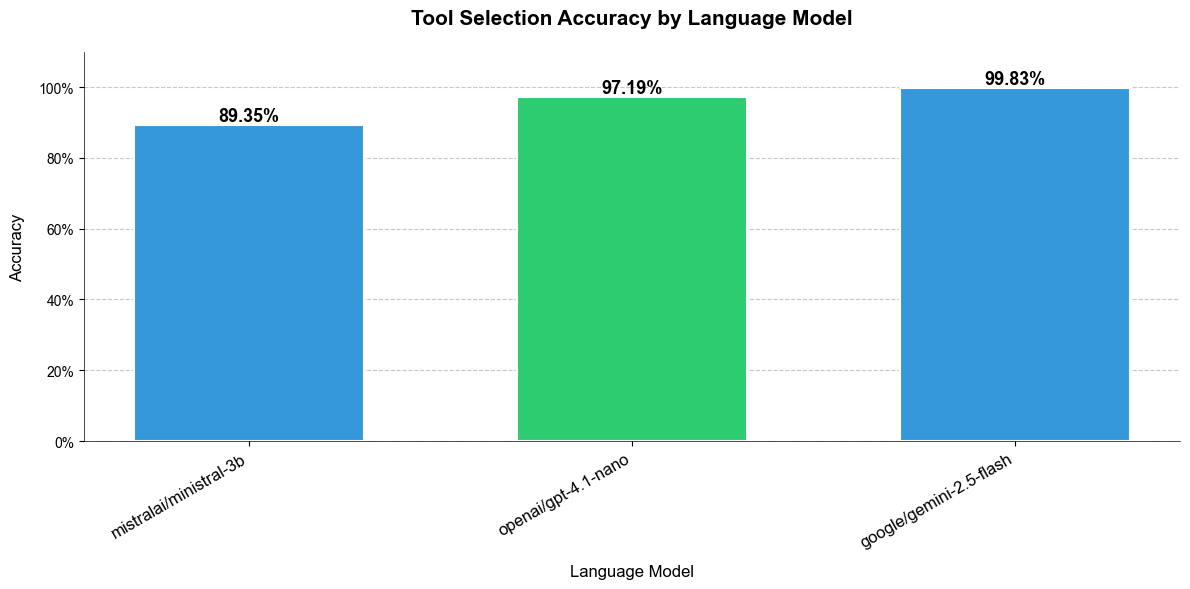

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Set the style
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Calculate mean accuracy
mean_accuracy = results_df.groupby('llm')['tool_correct'].mean().sort_values()

# Custom colors with higher saturation
colors = ['#3498db', '#2ecc71']  # Vibrant blue and green

# Create bars
bars = ax.bar(
    mean_accuracy.index,
    mean_accuracy.values,
    color=colors,
    width=0.6,
    edgecolor='white',
    linewidth=1.5
)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2.,
        height,
        f'{height:.2%}',
        ha='center',
        va='bottom',
        fontsize=13,
        fontweight='bold'
    )

# Customize the plot
ax.set_title('Tool Selection Accuracy by Language Model', 
             pad=20, 
             fontsize=15, 
             fontweight='bold')
ax.set_xlabel('Language Model', fontsize=12, labelpad=10)
ax.set_ylabel('Accuracy', fontsize=12, labelpad=10)

# Customize grid
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)  # Place gridlines behind bars

# Customize spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Set y-axis limits with some padding
ax.set_ylim(0, min(1.1, max(mean_accuracy.values) * 1.15))

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
# Rotate x-axis labels
ax.set_xticklabels(mean_accuracy.index, rotation=30, ha='right', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.savefig('tool_acc.png', dpi=1000)

In [24]:
# Group by LLM and tool
grouped = results_df.groupby(['llm', 'expected_tool'])

# Compute TP, FP, FN
metrics = []
metrics = []

for llm in results_df['llm'].unique():
    for tool in results_df['expected_tool'].unique():
        df_llm = results_df[results_df['llm'] == llm]

        tp = ((df_llm['first_tool_used_by_agent'] == tool) & (df_llm['expected_tool'] == tool)).sum()
        fp = ((df_llm['first_tool_used_by_agent'] == tool) & (df_llm['expected_tool'] != tool)).sum()
        fn = ((df_llm['first_tool_used_by_agent'] != tool) & (df_llm['expected_tool'] == tool)).sum()

        precision = tp / (tp + fp) if (tp + fp) else 0
        recall = tp / (tp + fn) if (tp + fn) else 0

        metrics.append({
            'llm': llm,
            'tool': tool,
            'precision': precision,
            'recall': recall
        })


metrics_df = pd.DataFrame(metrics)
metrics_df

,llm,tool,precision,recall
0,google/gemini-2.5-flash,email_sender_tool,1.000000,1.000000
1,google/gemini-2.5-flash,calendar_scheduling_tool,1.000000,1.000000
2,google/gemini-2.5-flash,serp_tool,1.000000,0.991667
3,google/gemini-2.5-flash,translation_tool,1.000000,1.000000
4,google/gemini-2.5-flash,weather_forecast_tool,1.000000,1.000000
5,google/gemini-2.5-flash,python_repl_tool,0.989011,1.000000
6,google/gemini-2.5-flash,database_query_tool,1.000000,1.000000
7,google/gemini-2.5-flash,google_spreadsheet_tool,1.000000,0.983051
8,google/gemini-2.5-flash,crm_contact_tool,1.000000,1.000000
9,google/gemini-2.5-flash,social_media_tool,1.000000,1.000000


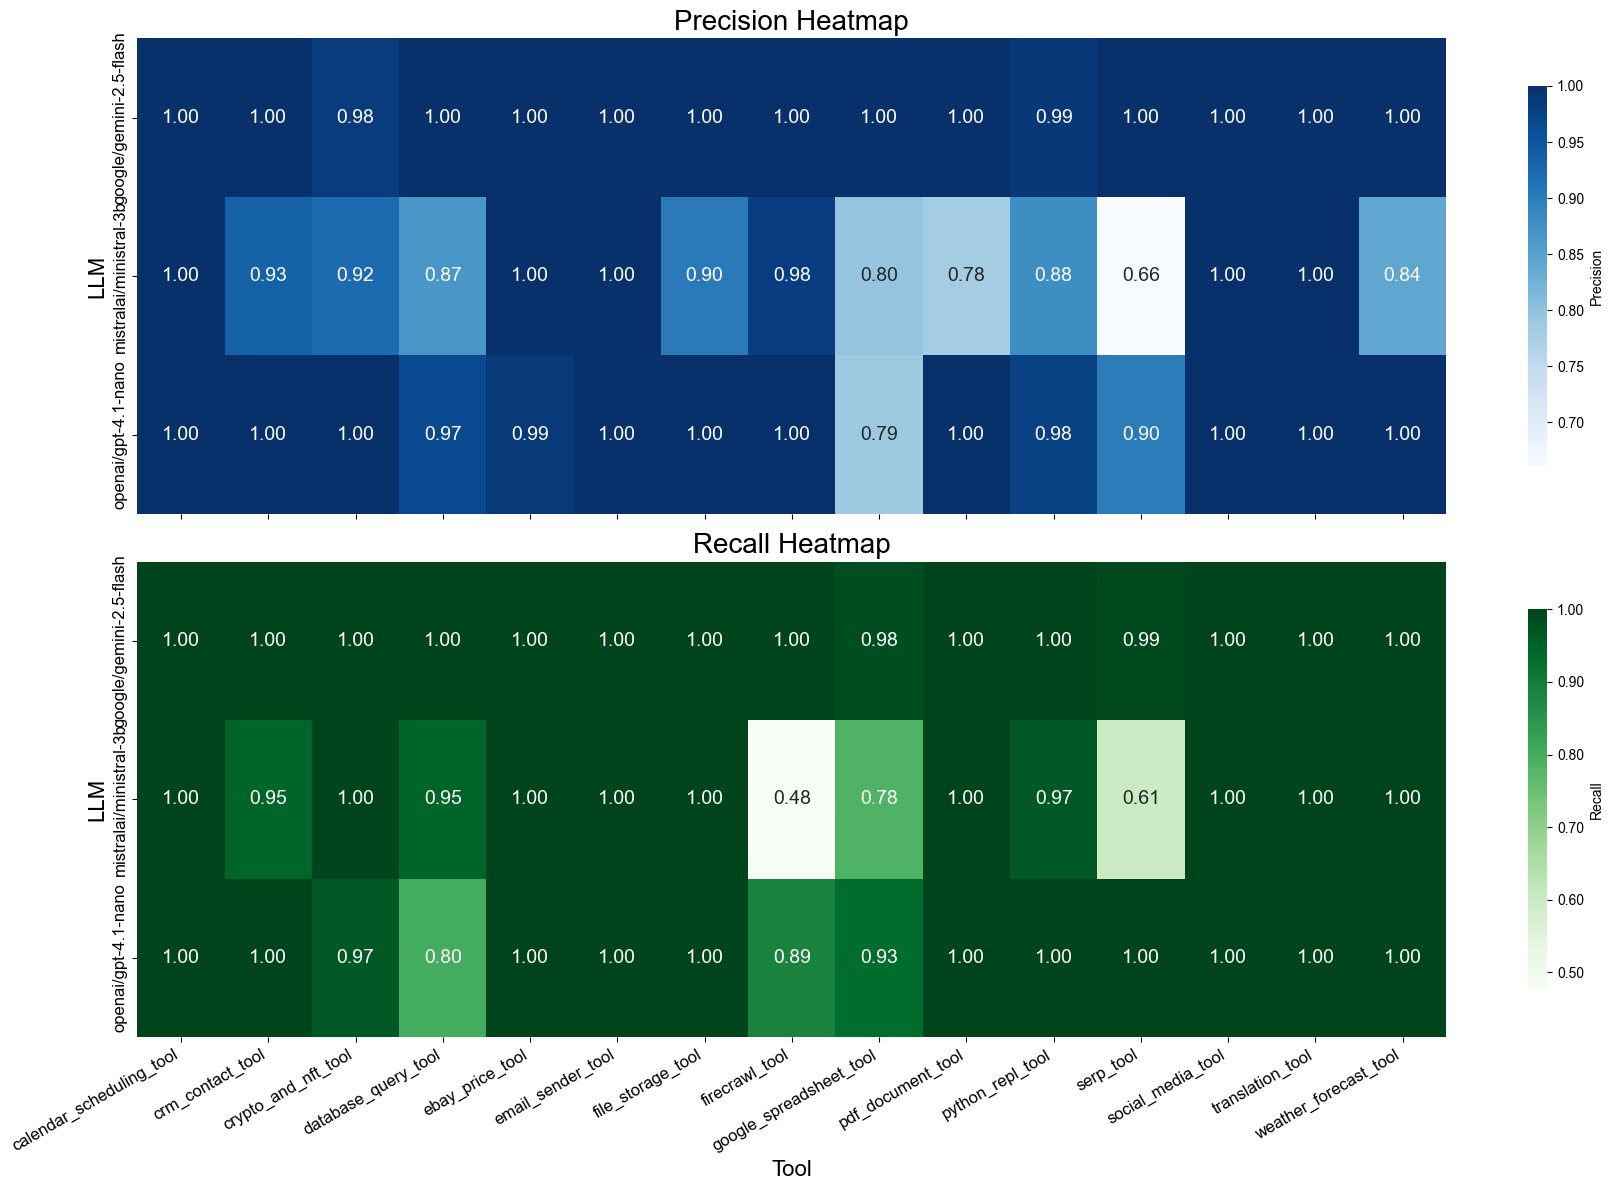

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_precision = metrics_df.pivot(index='llm', columns='tool', values='precision')
pivot_recall = metrics_df.pivot(index='llm', columns='tool', values='recall')

fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# Precision heatmap
sns.heatmap(
    pivot_precision, 
    annot=True, 
    fmt=".2f", 
    cmap="Blues", 
    annot_kws={"fontsize":14},
    cbar_kws={"shrink":0.8, "label": "Precision", "format":'%.2f'},
    ax=axes[0]
)
axes[0].set_title("Precision Heatmap", fontsize=20)
axes[0].set_xlabel("")
axes[0].set_ylabel("LLM", fontsize=16)
axes[0].set_xticklabels(pivot_precision.columns, rotation=30, ha='right', fontsize=12)
axes[0].set_yticklabels(pivot_precision.index, fontsize=12)

# Recall heatmap
sns.heatmap(
    pivot_recall, 
    annot=True, 
    fmt=".2f", 
    cmap="Greens", 
    annot_kws={"fontsize":14},
    cbar_kws={"shrink":0.8, "label": "Recall", "format":'%.2f'},
    ax=axes[1]
)
axes[1].set_title("Recall Heatmap", fontsize=20)
axes[1].set_xlabel("Tool", fontsize=16)
axes[1].set_ylabel("LLM", fontsize=16)
axes[1].set_xticklabels(pivot_recall.columns, rotation=30, ha='right', fontsize=12)
axes[1].set_yticklabels(pivot_recall.index, fontsize=12)

plt.tight_layout()
plt.savefig("precision_recall_heatmaps.png", dpi=300)
plt.show()


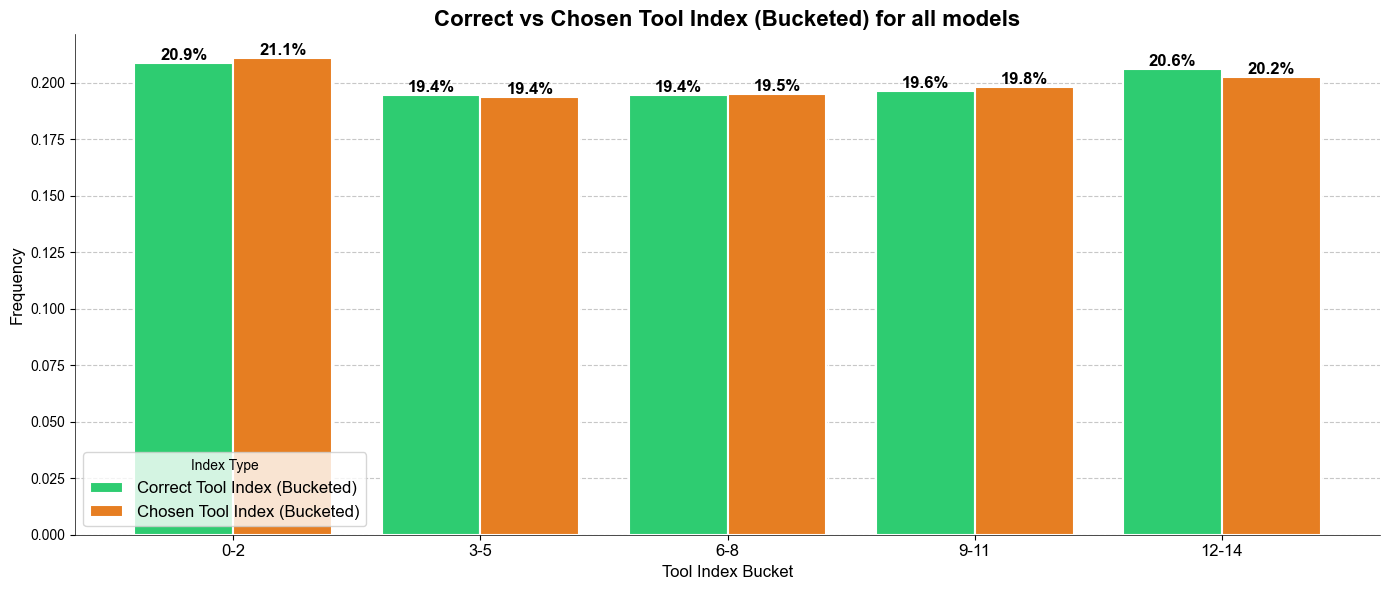

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Define bucket size (same as in other graphs)
bucket_size = 3

# Function to bucket indices
def bucket_index(idx):
    return int(idx) // bucket_size

# Drop NaNs and bucket the indices
correct_buckets = results_df['correct_tool_index'].dropna().astype(int).apply(bucket_index)
chosen_buckets = results_df['chosen_tool_index'].dropna().astype(int).apply(bucket_index)

# Get normalized counts for each bucket
correct_counts_bucketed = correct_buckets.value_counts(normalize=True).sort_index()
chosen_counts_bucketed = chosen_buckets.value_counts(normalize=True).sort_index()

# Align indices
all_buckets = sorted(set(correct_counts_bucketed.index).union(set(chosen_counts_bucketed.index)))
correct_counts_bucketed = correct_counts_bucketed.reindex(all_buckets, fill_value=0)
chosen_counts_bucketed = chosen_counts_bucketed.reindex(all_buckets, fill_value=0)

# Prepare x locations
x = np.arange(len(all_buckets))
bar_width = 0.4

# Plot side-by-side bars with new colors
fig, ax = plt.subplots(figsize=(14, 6))
bars_correct = ax.bar(
    x - bar_width / 2, correct_counts_bucketed, width=bar_width, color='#2ecc71', edgecolor='white', linewidth=1.5, label='Correct Tool Index (Bucketed)'
)
bars_chosen = ax.bar(
    x + bar_width / 2, chosen_counts_bucketed, width=bar_width, color='#e67e22', edgecolor='white', linewidth=1.5, label='Chosen Tool Index (Bucketed)'
)

# Add value labels on top of each bar
for bars in [bars_correct, bars_chosen]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2.,
            height,
            f'{round(height * 100, 1)}%',
            ha='center',
            va='bottom',
            fontsize=12,
            fontweight='bold'
        )

# Customize the plot
ax.set_title(f'Correct vs Chosen Tool Index (Bucketed) for all models', fontsize=16, fontweight='bold')
ax.set_xlabel('Tool Index Bucket', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels([f'{i*bucket_size}-{(i+1)*bucket_size-1}' for i in all_buckets], fontsize=12)

# Customize grid and spines
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

# Add legend
ax.legend(title='Index Type', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


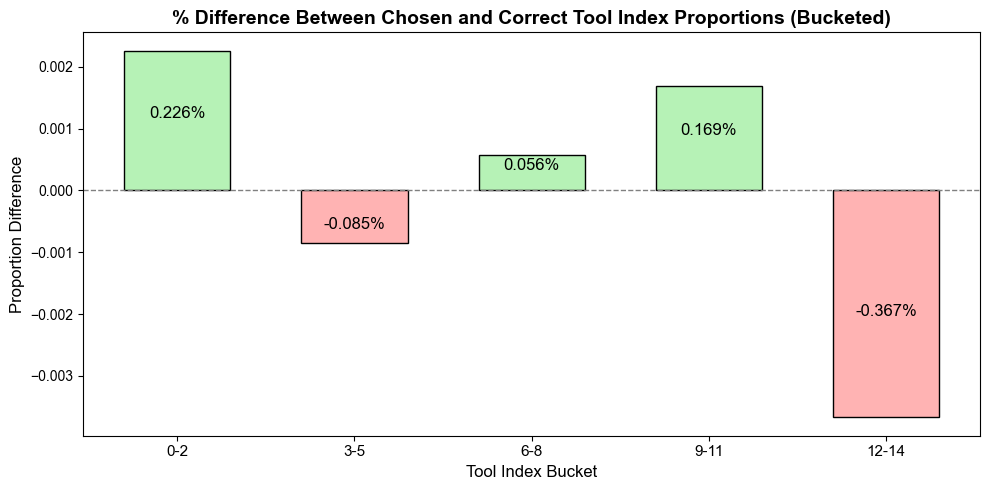

In [ ]:
# Define bucket size
bucket_size = 3

# Function to bucket indices
def bucket_index(idx):
    return int(idx) // bucket_size

# Bucket and count correct tool indices
correct_buckets = results_df['correct_tool_index'].dropna().astype(int).apply(bucket_index)
overall_correct_counts_bucketed = correct_buckets.value_counts(normalize=True).sort_index()

# Bucket and count chosen tool indices
chosen_buckets = results_df['chosen_tool_index'].dropna().astype(int).apply(bucket_index)
overall_chosen_counts_bucketed = chosen_buckets.value_counts(normalize=True).sort_index()
import matplotlib.pyplot as plt
import numpy as np

# Calculate the difference
bucket_diff = overall_chosen_counts_bucketed - overall_correct_counts_bucketed

# Choose colors: light green for positive, light red for negative
bar_colors = ['#b6f2b6' if v >= 0 else '#ffb3b3' for v in bucket_diff]

# Plot the difference
fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(bucket_diff))
ax.bar(x, bucket_diff, color=bar_colors, edgecolor='black', width=0.6)

ax.set_title('% Difference Between Chosen and Correct Tool Index Proportions (Bucketed)', fontsize=14, fontweight='bold')
ax.set_xlabel('Tool Index Bucket', fontsize=12)
ax.set_ylabel('Proportion Difference', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels([f'{i*bucket_size}-{(i+1)*bucket_size-1}' for i in x], fontsize=11)

# Add value labels
for i, v in enumerate(bucket_diff):
    ax.text(i, v + (-abs(v) / 2 if v >= 0 else abs(v) / 2), f'{v * 100:.3f}%', ha='center', va='bottom' if v >= 0 else 'top', fontsize=12)

ax.axhline(0, color='gray', linewidth=1, linestyle='--')
plt.tight_layout()
plt.savefig('bucketed_tool_index_difference.png', dpi=300)
plt.show()

In [28]:
overall_chosen_counts_bucketed, overall_correct_counts_bucketed

(chosen_tool_index
 0    0.210838
 1    0.193621
 2    0.195032
 3    0.198137
 4    0.202371
 Name: proportion, dtype: float64,
 correct_tool_index
 0    0.208580
 1    0.194468
 2    0.194468
 3    0.196444
 4    0.206040
 Name: proportion, dtype: float64)

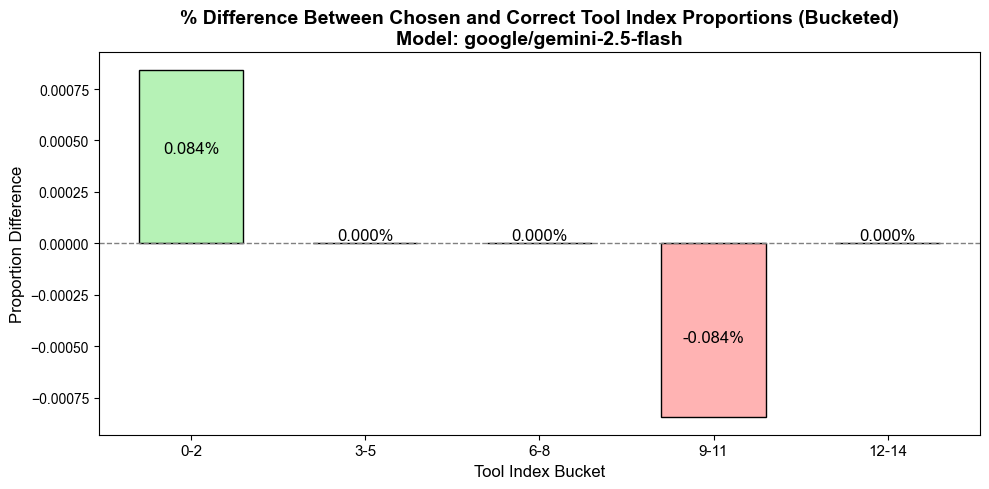

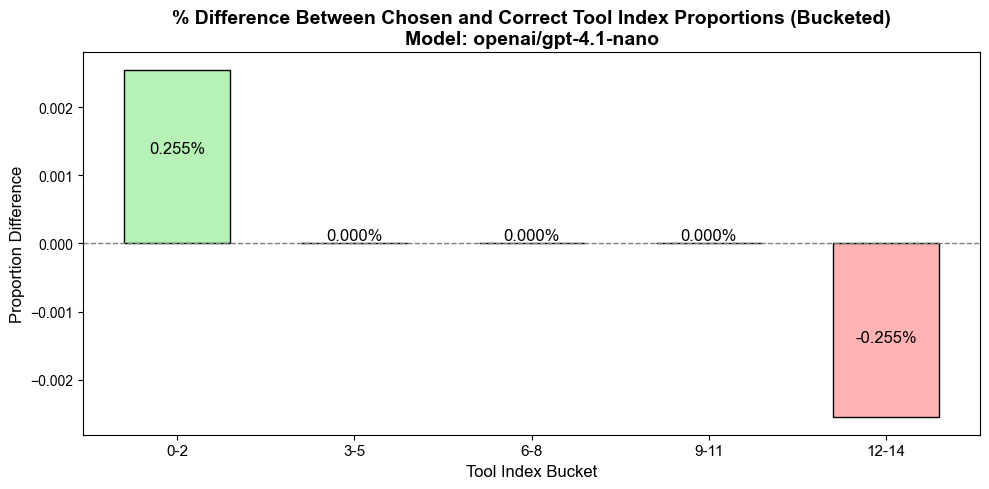

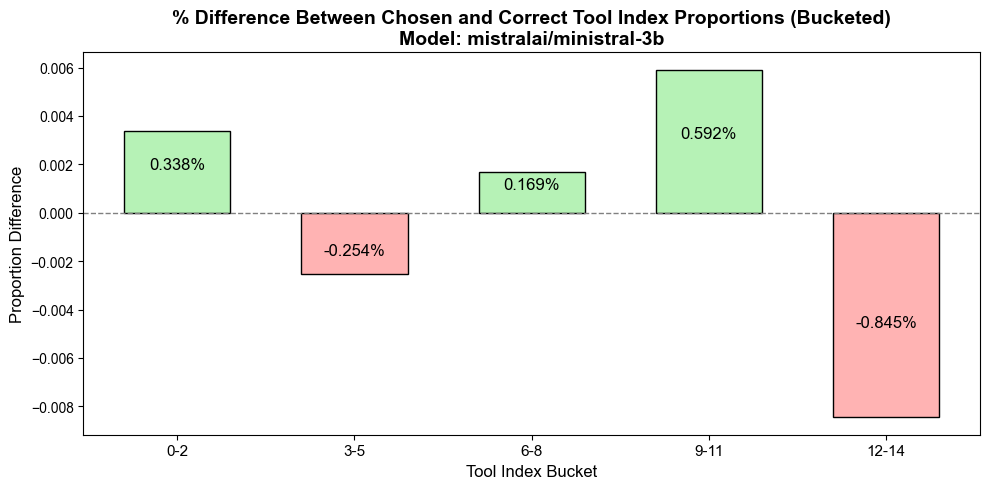

In [29]:
import matplotlib.pyplot as plt
import numpy as np

bucket_size = 3

for MODEL_NAME in results_df['llm'].unique():
    llm_results = results_df[results_df['llm'] == MODEL_NAME].dropna(subset=['correct_tool_index', 'chosen_tool_index'])
    
    # Bucket and count correct tool indices
    correct_buckets = llm_results['correct_tool_index'].astype(int).apply(lambda idx: int(idx) // bucket_size)
    correct_counts_bucketed = correct_buckets.value_counts(normalize=True).sort_index()
    
    # Bucket and count chosen tool indices
    chosen_buckets = llm_results['chosen_tool_index'].astype(int).apply(lambda idx: int(idx) // bucket_size)
    chosen_counts_bucketed = chosen_buckets.value_counts(normalize=True).sort_index()
    
    # Align indices
    all_buckets = sorted(set(correct_counts_bucketed.index).union(set(chosen_counts_bucketed.index)))
    correct_counts_bucketed = correct_counts_bucketed.reindex(all_buckets, fill_value=0)
    chosen_counts_bucketed = chosen_counts_bucketed.reindex(all_buckets, fill_value=0)
    bucket_diff = chosen_counts_bucketed - correct_counts_bucketed

    bar_colors = ['#b6f2b6' if v >= 0 else '#ffb3b3' for v in bucket_diff]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 5))
    x = np.arange(len(all_buckets))
    ax.bar(x, bucket_diff, color=bar_colors, edgecolor='black', width=0.6)

    ax.set_title(f'% Difference Between Chosen and Correct Tool Index Proportions (Bucketed)\nModel: {MODEL_NAME}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Tool Index Bucket', fontsize=12)
    ax.set_ylabel('Proportion Difference', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels([f'{i*bucket_size}-{(i+1)*bucket_size-1}' for i in all_buckets], fontsize=11)

    # Add value labels
    for i, v in enumerate(bucket_diff):
        ax.text(i, v + (-abs(v) / 2 if v >= 0 else abs(v) / 2), f'{v * 100:.3f}%', ha='center', va='bottom' if v >= 0 else 'top', fontsize=12)

    ax.axhline(0, color='gray', linewidth=1, linestyle='--')
    plt.tight_layout()
    plt.savefig(f'bucketed_tool_index_difference_{MODEL_NAME.replace("/", "_")}.png', dpi=300)
    plt.show()
